In [14]:
import pandas as pd

In [115]:
import json

In [135]:
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df_tw = pd.read_excel('../../data/Tom_Twitter_7_27_17.xls')

In [118]:
df_tw = df_tw.head()

In [119]:
df_tw.to_dict(orient='record')

[{u'action_item': nan,
  u'callDate': nan,
  u'complaint_date': nan,
  u'complaint_num': nan,
  u'conversation_tracking_attempted_': Timestamp('1900-01-01 00:00:00'),
  u'created_date': Timestamp('2016-11-28 12:35:20'),
  u'dohmh_id': nan,
  u'emailDate': nan,
  u'final_status': nan,
  u'final_status_date': nan,
  u'foursquare_checkin_attempted_dat': Timestamp('1900-01-01 00:00:00'),
  u'id': 871087,
  u'in_reply_to_tweet_id': nan,
  u'interviewDate': nan,
  u'interviewStatus': nan,
  u'is311': nan,
  u'is_foodborne': nan,
  u'is_nyc': 1,
  u'is_nycetrack': nan,
  u'is_same_as_reviewer': nan,
  u'label_notes': nan,
  u'label_nyc_located': u'YES',
  u'label_serious_enough': nan,
  u'label_someone_got_sick': u'YES',
  u'label_timing_consistent': nan,
  u'labeled_by_user_id': 10007,
  u'labeled_date': Timestamp('2016-11-28 17:21:00'),
  u'latitude': 0.0,
  u'linkSentDate': nan,
  u'location': u'Bronx, NY',
  u'longitude': 0.0,
  u'maven_outbreak_event_id': nan,
  u'message_date': nan,
  u

In [120]:
sick_df = pd.read_csv('../../data/yelp_sick_data.csv')
sick_df = sick_df.head()
sick_df

,data,label,old_score
0,My friends and I ordered 3 burgers and a pitch...,1,0.918919
1,Went here yesterday with a friend. We both go...,1,0.982935
2,If I was writing this review for Choice Market...,1,0.918919
3,"First, let me just say I have had El Rey numer...",1,0.982935
4,Disappointment: the tapas taste quite well and...,1,0.918919


In [121]:
print json.dumps(sick_df.to_dict(orient='record'), default=str, indent=2)

[
  {
    "data": "My friends and I ordered 3 burgers and a pitcher of sangria. Everything tasted good. Later on in the day we all got a stomach ache then 1 by 1 we all had to use the restroom several times before the days end. I love this place, but something there made us sick. \n\nIf I go back, I&#39;m going to stick with bottled beer.", 
    "old_score": 0.918918918919, 
    "label": 1
  }, 
  {
    "data": "Went here yesterday with a friend.  We both got food poisoning, most likely from the cajun chicken. Resulted in a pretty rough night last night and for my friend, a rough day today (will spare the details, but you can imagine).\n\nWould recommend steering clear unless you&#39;re looking to ruin about 24 hours of your life.\n\nGood happy hour special though after the last 24 hours I&#39;d stick to bottled beverages, trust factor on anything prepared there is low.\n\nAs an aside, during a previous trip, we were required to order at our tables rather than the counter, this caused 

In [122]:
print json.dumps(df_tw.to_dict(orient='record'), default=str, indent=2)

[
  {
    "serialized_urls": "[]", 
    "callDate": NaN, 
    "text": "Think I might have food poisoning", 
    "nycetrack_id": NaN, 
    "final_status_date": NaN, 
    "labeled_date": "2016-11-28 17:21:00", 
    "is_nyc": 1, 
    "tweet_id": 871087.0, 
    "surveyConfirmsFB": NaN, 
    "label_notes": NaN, 
    "id": 871087, 
    "user_tweet_id": 871087.0, 
    "conversation_tracking_attempted_": "1900-01-01 00:00:00", 
    "complaint_date": NaN, 
    "source": "TWITTER", 
    "serialized_symbols": "[]", 
    "is_nycetrack": NaN, 
    "people_affected": 1, 
    "label_someone_got_sick": "YES", 
    "location": "Bronx, NY", 
    "sick_score": 0.84520804114072, 
    "latitude": 0.0, 
    "review_contributed": NaN, 
    "emailDate": NaN, 
    "action_item": NaN, 
    "is_same_as_reviewer": NaN, 
    "foursquare_checkin_attempted_dat": "1900-01-01 00:00:00", 
    "message_date": NaN, 
    "serialized_hashtags": "[]", 
    "dohmh_id": NaN, 
    "label_nyc_located": "YES", 
    "sick_date": 

In [123]:
# df_tw.to_csv('../../data/Tom_Twitter_7_27_17_sample.csv', encoding='utf-8')
df_tw = pd.read_excel('../../data/Tom_Twitter_7_27_17.xls')

In [124]:
# cols = ['text',
#         'label_nyc_located',
#         'label_serious_enough',
#         'label_someone_got_sick',
#         'label_timing_consistent',
#         'labeled_date']
# print [x for x in list(df_tw.columns) if 'label' in x]
# print [x for x in list(df_tw.columns) if 'sick' in x]
# print [x for x in list(df_tw.columns) if 'mult' in x]
# print [x for x in list(df_tw.columns) if 'text' in x]
# print [x for x in list(df_tw.columns) if 'is' in x]
# print [x for x in list(df_tw.columns) if 'score' in x]

In [125]:
df_tw = df_tw[['text', 'label_someone_got_sick', 'sick_score']]


In [126]:
df_tw['label_someone_got_sick'].value_counts()

NO         7113
YES        2580
MAYBE       521
UNKNOWN     118
Name: label_someone_got_sick, dtype: int64

In [127]:
idx = df_tw['label_someone_got_sick'].map({'YES':True, 'NO':True}).fillna(False)
df_tw = df_tw[idx]

In [128]:
df_tw['label_someone_got_sick'].value_counts()

NO     7113
YES    2580
Name: label_someone_got_sick, dtype: int64

In [129]:
df_tw['label_someone_got_sick'] = df_tw['label_someone_got_sick'].map({'YES':1, 'NO':0})

0


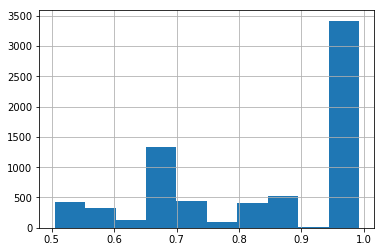

1


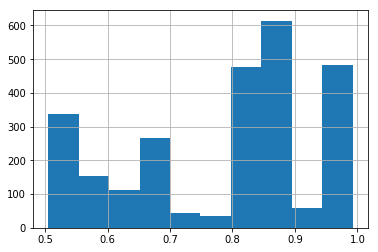

In [136]:
# df_tw.sick_score.hist()
for name,g in df_tw.groupby('label_someone_got_sick'):
    print name
    g.sick_score.hist()
    plt.show()

In [148]:
df_tw.columns = ['data', 'label', 'old_score']
df_tw.to_csv('../../data/twitter_sick_data.csv', encoding='UTF-8', index=False)

In [149]:
print pd.concat([
    pd.read_csv('../../data/yelp_sick_data.csv').head(),
    pd.read_csv('../../data/twitter_sick_data.csv').head()
])

                                                data  label  old_score
0  My friends and I ordered 3 burgers and a pitch...      1   0.918919
1  Went here yesterday with a friend.  We both go...      1   0.982935
2  If I was writing this review for Choice Market...      1   0.918919
3  First, let me just say I have had El Rey numer...      1   0.982935
4  Disappointment: the tapas taste quite well and...      1   0.918919
0                  Think I might have food poisoning      1   0.845208
1  The story behind the lost soul #JamesMeans has...      0   0.992424
2  At this at a place that will probably give us ...      0   0.611694
3  I wish the food was ready as soon as the clock...      0   0.596591
4  Frantically trying to cool a gallon of liquid ...      0   0.579203
